# 🧪 Laboratorio de Introducción al Procesamiento de Lenguaje Natural (NLP) con Python

## 📦 Requisitos
Ejecuta esta celda si aún no tienes las librerías necesarias.

In [1]:
!pip install spacy nltk textblob matplotlib wordcloud
!python -m textblob.download_corpora
!python -m spacy download en_core_web_sm
!python -m spacy download es_core_news_sm

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 69.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all th

## 🔹 Sección 1: Tokenización y Lematización

### 👩‍🏫 ¿Qué es esto?
- **Tokenización**: dividir un texto en unidades (palabras, puntuación, etc.)
- **Lematización**: transformar las palabras a su forma base o “diccionario” (ej. _went → go_)

### 🔍 Ejemplo guiado (Inglés)

In [2]:
import spacy

nlp = spacy.load("en_core_web_sm")
text = "Users are interacting with smart assistants more and more every day."
doc = nlp(text)

print("Tokens:")
print([token.text for token in doc])

print("\nLemmas:")
print([token.lemma_ for token in doc])

Tokens:
['Users', 'are', 'interacting', 'with', 'smart', 'assistants', 'more', 'and', 'more', 'every', 'day', '.']

Lemmas:
['user', 'be', 'interact', 'with', 'smart', 'assistant', 'more', 'and', 'more', 'every', 'day', '.']


### 🧪 Ejercicio directo
➡️ Cambia el texto a español y carga el modelo `es_core_news_sm`.

In [11]:
# TODO: escribe tu código aquí para analizar un texto en español
nlp = spacy.load("es_core_news_sm")
text = "Los usuarios están interactuando con asistentes inteligentes cada vez mas."
doc = nlp(text)

print("Tokens:")
print([token.text for token in doc])

print("\nLemmas:")
print([token.lemma_ for token in doc])

Tokens:
['Los', 'usuarios', 'están', 'interactuando', 'con', 'asistentes', 'inteligentes', 'cada', 'vez', 'mas', '.']

Lemmas:
['el', 'usuario', 'estar', 'interactuar', 'con', 'asistente', 'inteligente', 'cada', 'vez', 'mas', '.']


> ❓ ¿Qué palabra se transforma a su forma base de forma más inesperada?

*Las trasformaciones son esperables (los sustantivos en plural se pasan a singular y los verbos pasan a su forma base), aunque me sorprendió el cambio de 'interacturando' a 'interactuar' ya que solo había pensando en el cambio del verbo 'están' a 'estar'.*

### 🚀 Aplicación práctica
💡 Crea una función `procesar_texto(texto)` que reciba una frase y devuelva los tokens y lemas. Úsala para analizar:
- 3 titulares de periódicos
- 3 comentarios de clientes

In [19]:
# TODO: escribe tu función aquí

print("Escribe tu texto:")
texto = input()

def procesar_texto(texto):
    nlp = spacy.load("es_core_news_sm")
    doc = nlp(texto)

    print("Tokens:")
    print([token.text for token in doc])

    print("\nLemmas:")
    print([token.lemma_ for token in doc])

procesar_texto(texto)
'''
Titulares de periódicos usados en las pruebas:
-Una ola de 13 suicidios en una misma dirección general conmociona al Ministerio de Economía de Francia
-Lula responde al tarifazo de Trump por el juicio a Bolsonaro con el anuncio de aranceles recíprocos
-La opacidad en la venta de armas europeas, un fenómeno que los países justifican por la seguridad nacional

Comentarios de clientes usados en las pruebas:
-Aguanta perfectamente
-El cable que las sujeta es de acero, asique aunque lo mordisquean, no lo pueden romper.
-Las ventosas que van directas a la hamaca no aguantan.

'''
# Prueba la función con textos reales

Escribe tu texto:
Las ventosas que van directas a la hamaca no aguantan
Tokens:
['Las', 'ventosas', 'que', 'van', 'directas', 'a', 'la', 'hamaca', 'no', 'aguantan']

Lemmas:
['el', 'ventosa', 'que', 'ir', 'directa', 'a', 'el', 'hamaca', 'no', 'aguantar']


'\nTitulares de periódicos usados en las pruebas:\n-Una ola de 13 suicidios en una misma dirección general conmociona al Ministerio de Economía de Francia\n-Lula responde al tarifazo de Trump por el juicio a Bolsonaro con el anuncio de aranceles recíprocos\n-La opacidad en la venta de armas europeas, un fenómeno que los países justifican por la seguridad nacional\n\nComentarios de clientes usados en las pruebas:\n-Aguanta perfectamente\n-El cable que las sujeta es de acero, asique aunque lo mordisquean, no lo pueden romper.\n-Las ventosas que van directas a la hamaca no aguantan. \n\n'

## 🔹 Sección 2: Análisis de Sentimientos con TextBlob

### 👩‍🏫 ¿Qué mide?
- **Polarity**: de -1 (negativo) a +1 (positivo)
- **Subjectivity**: de 0 (objetivo) a 1 (muy subjetivo)

### 🔍 Ejemplo guiado

In [20]:
from textblob import TextBlob

texto = "The service was excellent and the food was amazing!"
blob = TextBlob(texto)

print("Polaridad:", blob.sentiment.polarity)
print("Subjetividad:", blob.sentiment.subjectivity)

Polaridad: 0.875
Subjetividad: 0.95


### 🧪 Ejercicio directo
➡️ Crea una lista de opiniones y analiza su polaridad y subjetividad.

In [50]:
# TODO: crea una lista de opiniones y analiza cada una con TextBlob
'''
Lista de opiniones usadas:
-Excellent service with a wide range of local and national wines. Food is served quickly and the menu is small but offers something for everyone.
-Be aware here its a microwaved eatery not a tavern. Clearly the place doesn’t respect their customers.
-Is it possible I experienced the classic tourist trap or this is just now for me? We tried 5 different meals and neither was good - for our taste.
-I really don't understand the good rating for this restaurant, the food was terrible
'''

texto_review = "Is it possible I experienced the classic tourist trap or this is just now for me? We tried 5 different meals and neither was good - for our taste."
blob = TextBlob(texto_review)

print("Polaridad:", blob.sentiment.polarity)
print("Subjetividad:", blob.sentiment.subjectivity)


Polaridad: 0.3333333333333333
Subjetividad: 0.6533333333333333


### 🚀 Aplicación real
📊 Mini reto: clasifica un conjunto de opiniones como _positivas_, _negativas_ o _neutras_ y crea un gráfico con `matplotlib`.

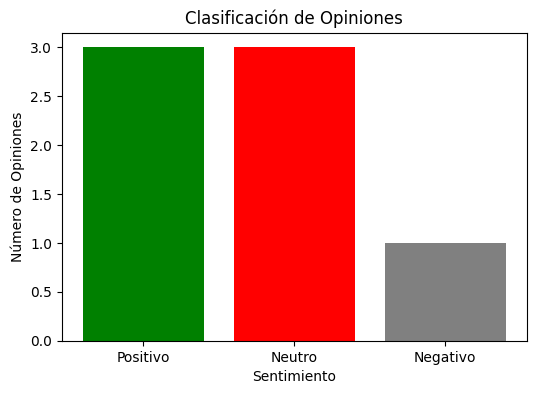

In [53]:
# TODO: clasifica opiniones y visualiza los resultados en un gráfico
import pandas as pd
import matplotlib.pyplot as plt

opiniones = [
    "The food was excellent and the staff was very friendly.",
    "I hated the place. Terrible service and dirty tables.",
    "It was okay, nothing special.",
    "Absolutely loved it! Five stars.",
    "The ambiance was decent, but the food was bland.",
    "Disappointing. I expected more.",
    "Pretty average overall."
]

datos = []

for texto in opiniones:
    blob = TextBlob(texto)
    polaridad = blob.sentiment.polarity

    if polaridad > 0.1:
        sentimiento = 'Positivo'
    elif polaridad < -0.1:
        sentimiento = 'Negativo'
    else:
        sentimiento = 'Neutro'

    datos.append({'texto': texto, 'polaridad': polaridad, 'sentimiento': sentimiento})

df = pd.DataFrame(datos)

conteo = df['sentimiento'].value_counts() #Cuantas de cada

plt.figure(figsize=(6,4))
plt.bar(conteo.index, conteo.values, color=['green', 'red', 'gray'])
plt.title('Clasificación de Opiniones')
plt.xlabel('Sentimiento')
plt.ylabel('Número de Opiniones')
plt.show()


## 🔹 Sección 3: Reconocimiento de Entidades (NER)

### 👩‍🏫 ¿Qué detecta?
- Nombres de personas, empresas, lugares, fechas, etc.

### 🔍 Ejemplo guiado

In [28]:
text = "Tesla was founded by Elon Musk in California in 2003."
nlp = spacy.load("en_core_web_sm")
doc = nlp(text)

for ent in doc.ents:
    print(ent.text, "→", ent.label_)

Elon Musk → PERSON
California → GPE
2003 → DATE


### 🧪 Ejercicio directo
➡️ Usa este texto:

In [30]:
# TODO: analiza entidades en el texto: "La Copa Mundial de la FIFA 2022 se celebró en Qatar y fue ganada por Argentina."
texto = "La Copa Mundial de la FIFA 2022 se celebró en Qatar y fue ganada por Argentina."
nlp = spacy.load("es_core_news_sm")
doc = nlp(texto)

for ent in doc.ents:
    print(ent.text, "→", ent.label_)


Copa Mundial de la FIFA 2022 → MISC
Qatar → LOC
Argentina → LOC


### 🚀 Aplicación real
💼 Crea una función que extraiga nombres de personas, lugares y organizaciones de un texto.

In [34]:
# TODO: crea tu función de extracción de entidades

texto_apl = input()

def extraer_entidades(texto_apl):
    nlp = spacy.load("es_core_news_sm")
    doc = nlp(texto_apl)

    for ent in doc.ents:
      print(ent.text, "→", ent.label_)

extraer_entidades(texto_apl)

La UE es una organización de países regida por Manuel en Madrid.
UE → ORG
Manuel → PER
Madrid → LOC


## 🔹 BONUS: Nube de palabras y limpieza básica

### 👩‍🏫 ¿Para qué sirve?
- Visualizar las palabras más usadas en un texto

### 🔍 Código guiado

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


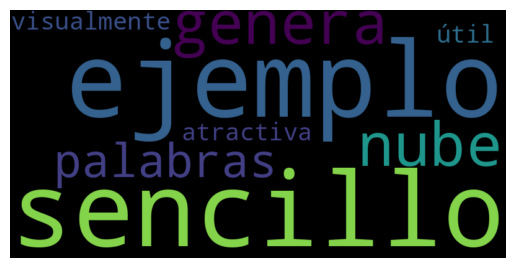

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

texto = "Este es un ejemplo sencillo que genera una nube de palabras visualmente atractiva y útil."
stop_words = set(stopwords.words('spanish'))
palabras = [word for word in texto.lower().split() if word not in stop_words]

wordcloud = WordCloud(width=800, height=400).generate(" ".join(palabras))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### 🧪 Ejercicio
➡️ Prueba con un conjunto de reseñas o comentarios reales.

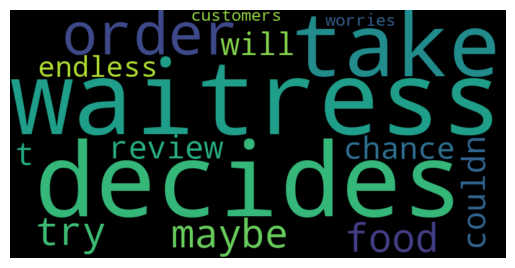

In [35]:
# TODO: copia un texto largo y genera su nube de palabras
texto_largo = "If waitress decides to take your order, maybe you can try their food and review. I couldn’t have this chance, but there will be endless customers, so no worries."
stop_words = set(stopwords.words('spanish'))
palabras = [word for word in texto_largo.lower().split() if word not in stop_words]

wordcloud = WordCloud(width=800, height=400).generate(" ".join(palabras))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


## 🧩 Desafíos Finales

1. 🗣️ Analiza sentimientos de una lista de tweets o reseñas.
2. 📄 Crea dos nubes de palabras: una para comentarios positivos y otra para negativos.
3. 🧠 Reflexiona: ¿cómo aplicarías esto en tu contexto laboral o académico?

In [48]:
# 1. Analiza sentimientos de una lista de tweets o reseñas.
tweets = [
    "I’m totally fine with emails. My only issue is when they get sent to me.",
    "*me sitting like a cooked shrimp* why does my back hurt",
    "Not to victim blame but why did you bring a needle into a haystack.",
    "all i want for christmas is just for my stomach to not feel weird for a single moment of my life"
]

positive = []
negative = []

for line in tweets:
  print(line)
  blob = TextBlob(line)
  print("Polaridad:", blob.sentiment.polarity)
  print("Subjetividad:", blob.sentiment.subjectivity)
  # 2. Crea dos nubes de palabras: una para comentarios positivos y otra para negativos.
  if blob.sentiment.polarity > 0:
    positive.append(line)
  else:
    negative.append(line)
print("Positive tweets:")
print(positive)
print("Negative tweets:")
print(negative)

I’m totally fine with emails. My only issue is when they get sent to me.
Polaridad: 0.20833333333333334
Subjetividad: 0.75
*me sitting like a cooked shrimp* why does my back hurt
Polaridad: 0.0
Subjetividad: 0.0
Not to victim blame but why did you bring a needle into a haystack.
Polaridad: -0.07500000000000001
Subjetividad: 0.05
all i want for christmas is just for my stomach to not feel weird for a single moment of my life
Polaridad: -0.2857142857142857
Subjetividad: 0.6071428571428571
Positive tweets:
['I’m totally fine with emails. My only issue is when they get sent to me.']
Negative tweets:
['*me sitting like a cooked shrimp* why does my back hurt', 'Not to victim blame but why did you bring a needle into a haystack.', 'all i want for christmas is just for my stomach to not feel weird for a single moment of my life']


In [38]:
# 3. Reflexiona: ¿cómo aplicarías esto en tu contexto laboral o académico?
'''
En el contexto laboral, podríamos aplicar esta tecnología para saber si las
reseñas de nuestros clientes en los productos son objetivas o no y sin son
mayoritariamente negativas o positivas.
En el contexto académico, podríamos aplicar esta tecnología para mejorar los
cursos y los métodos de aprendizaje basándonos en el feedback humano.
'''

'\nEn el contexto laboral, podríamos aplicar esta tecnología para saber si las\nreseñas de nuestros clientes en los productos son objetivas o no y sin son\nmayoritariamente negativas o positivas.\nEn el contexto académico, podríamos aplicar esta tecnología para mejorar los\ncursos y los métodos de aprendizaje basándonos en el feedback humano.\n'